In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

with open('../results/scores_2.pickle', 'rb') as f:
    data = pickle.load(f)

In [2]:
avg_scores = []
for i, d in enumerate(data):
    if i < 100:
        avg = np.mean(data[:i+1])
    else:
        avg = np.mean(data[i-100:i])
    avg_scores.append(avg)

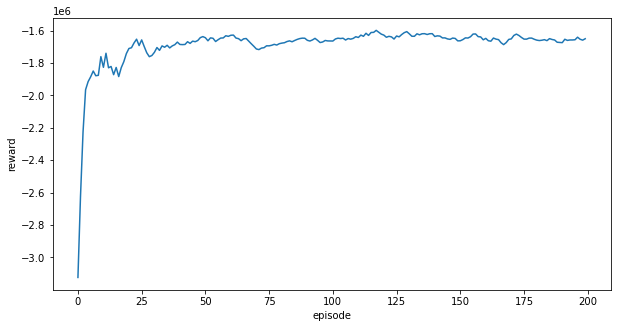

In [3]:
 x = [i for i in range(len(avg_scores))]
plt.figure(figsize=(10,5))
plt.plot(x, avg_scores)
plt.xlabel('episode')
plt.ylabel('reward')
plt.savefig('reward.png', dpi=300)
plt.show()

In [4]:
with open('../results/evaluation/rb_control.pickle', 'rb') as f:
    rb_control = pd.read_pickle(f)
    
with open('../results/evaluation/agent_control_2.pickle', 'rb') as f:
    agent_control = pd.read_pickle(f)

action_cols = [0,1,2,3,4,5]
temp_cols = [13,14]

In [6]:
def totals(df):
    df = df.copy()
    df['TOTAL POWER'] = df.iloc[:, action_cols].sum(axis=1)
    df['AVERAGE TEMP'] = df.iloc[:, temp_cols].mean(axis=1)
    df['ENERGY (kWh)'] = df['TOTAL POWER']*(3/60)
    
    total_energy = df['ENERGY (kWh)'].sum()
    mean_temp = df['AVERAGE TEMP'].mean()
    
    return df, total_energy, mean_temp

rb_control, rb_energy, rb_mean = totals(rb_control)
agent_control, agent_energy, agent_mean = totals(agent_control)
eff = (1-agent_energy/rb_energy)*100
temp_increase = ((agent_mean-rb_mean)/rb_mean)*100

print('Agent Energy (GWh): %.2f' % (agent_energy/1000))
print('RB Total Power Usage (GWh): %.2f' % (rb_energy/1000))
print('\n')
print('Agent Av Temp (oC): %.2f' % agent_mean)
print('RB Av Temp (oC): %.2f' % rb_mean)
print('\n')
print('Agent Efficiency Gain: %.2f' % eff)
print('Agent Temp Increase: %.2f' % temp_increase)

agent_control

Agent Energy (GWh): 130.25
RB Total Power Usage (GWh): 53.87


Agent Av Temp (oC): 2.24
RB Av Temp (oC): 2.18


Agent Efficiency Gain: -141.80
Agent Temp Increase: 2.43


,COOLER COMP POWER (kW) 1,COOLER COMP POWER (kW) 2,COOLER COMP POWER (kW) 3,COOLER COMP POWER (kW) 4,COOLER COMP POWER (kW) 5,COOLER COMP POWER (kW) 6,COOLER HUMIDITY 1,COOLER HUMIDITY 2,COOLER HUMIDITY 4,COOLER SLAB TEMP INSIDE 1,...,COOLER TEMP 2,OUTSIDE TEMP (oC),OUTSIDE DEW POINT (oC),OUTSIDE HUMIDITY (%),WIND DIR (DEGREES),WIND (km/h),PRESSURE (kPa),TOTAL POWER,AVERAGE TEMP,ENERGY (kWh)
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-07-15 11:00:00,4.6836,3.2436,4.5972,4.8204,0.0108,4.6512,0.6792,0.6682,0.7004,7.89,...,2.990000,25.900,16.40,55.00,13.0,17.0,100.010,22.0068,2.855000,1.10034
2020-07-15 11:03:00,4.6404,3.2328,4.6080,4.8384,0.0108,4.6764,0.6856,0.6690,0.7010,7.93,...,3.030000,25.925,16.41,54.95,13.2,17.0,100.009,22.0068,2.845000,1.10034
2020-07-15 11:06:00,4.7736,3.2292,4.6476,4.7592,0.0108,4.6836,0.6930,0.6652,0.7010,7.95,...,2.950000,25.950,16.42,54.90,13.4,17.0,100.008,22.1040,2.805000,1.10520
2020-07-15 11:09:00,4.6404,3.2256,4.6008,4.7196,0.0144,4.6512,0.6858,0.6644,0.7008,7.91,...,2.930000,25.975,16.43,54.85,13.6,17.0,100.007,21.8520,2.785000,1.09260
2020-07-15 11:12:00,5.5080,5.7024,5.1624,0.0000,5.1984,5.4288,0.6886,0.6642,0.7030,7.93,...,2.897404,26.000,16.44,54.80,13.8,17.0,100.006,27.0000,2.721301,1.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01 12:27:00,5.5080,5.7024,5.1624,0.0000,5.1984,5.4288,0.6164,0.5998,0.5978,4.12,...,2.062318,-6.900,-15.20,52.00,36.0,15.0,99.810,27.0000,2.143241,1.35000
2021-02-01 12:30:00,5.5080,5.7024,5.1624,0.0000,5.1984,5.4288,0.6194,0.5966,0.5966,4.10,...,2.058769,-6.900,-15.20,52.00,36.0,15.0,99.810,27.0000,2.145413,1.35000
2021-02-01 12:33:00,5.5080,5.7024,5.1624,0.0000,5.1984,5.4288,0.6144,0.5930,0.5946,4.12,...,2.053866,-6.900,-15.20,52.00,36.0,15.0,99.810,27.0000,2.145065,1.35000


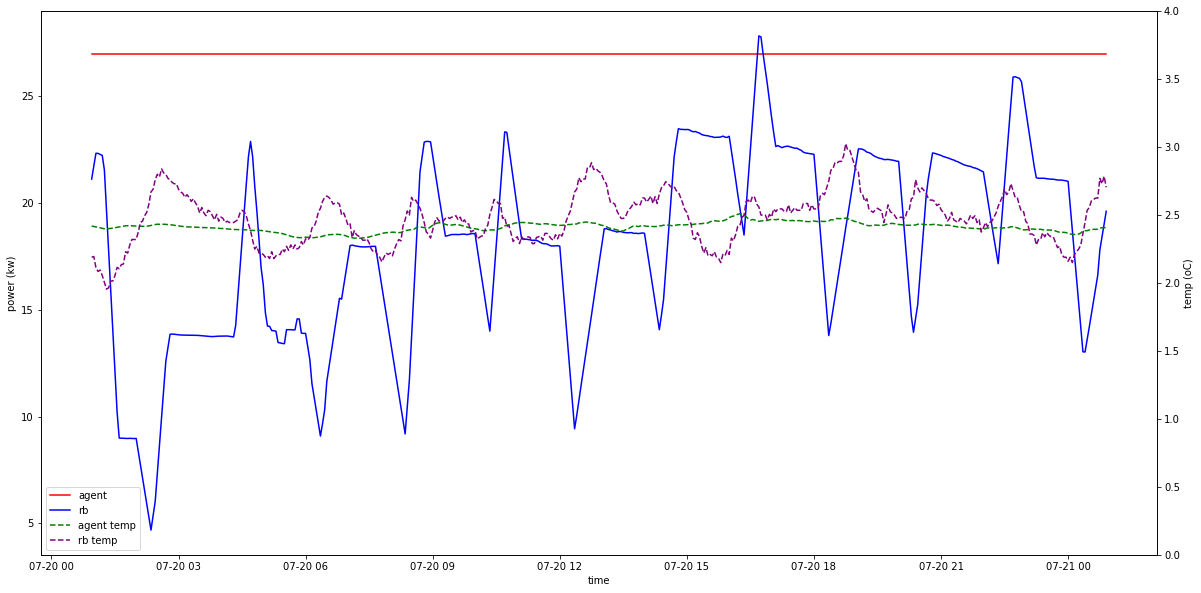

In [9]:
day = (60*24*1)/3
start = np.random.randint(0, high=rb_control.shape[0]-day, size=1)[0]
end = int(start+day)
x = agent_control.index[start:end]
agent_control['ROLLING'] = agent_control['TOTAL POWER'].rolling(window=7).mean()
rb_control['ROLLING'] = rb_control['TOTAL POWER'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20,10))
line1 = ax.plot(x, agent_control['ROLLING'].iloc[start:end], label='agent', c='red')
line2 = ax.plot(x, rb_control['ROLLING'].iloc[start:end], label='rb', c='blue')
ax2 = ax.twinx()
line3 = ax2.plot(x, agent_control['AVERAGE TEMP'].iloc[start:end], label='agent temp', c='green', linestyle='--')
line4 = ax2.plot(x, rb_control['AVERAGE TEMP'].iloc[start:end], label='rb temp', c='purple', linestyle='--')

lines, labs = ax.get_legend_handles_labels()
lines2, labs2 = ax2.get_legend_handles_labels()

ax.set_xlabel('time')
ax.set_ylabel('power (kw)')
ax2.set_ylabel('temp (oC)')
ax2.set_ylim([0, 4])


ax.legend(lines + lines2, labs+labs2, loc=0)
plt.savefig('results_week.png', dpi=300)
plt.show()

In [10]:
agent_control.head(25)

,COOLER COMP POWER (kW) 1,COOLER COMP POWER (kW) 2,COOLER COMP POWER (kW) 3,COOLER COMP POWER (kW) 4,COOLER COMP POWER (kW) 5,COOLER COMP POWER (kW) 6,COOLER HUMIDITY 1,COOLER HUMIDITY 2,COOLER HUMIDITY 4,COOLER SLAB TEMP INSIDE 1,...,OUTSIDE TEMP (oC),OUTSIDE DEW POINT (oC),OUTSIDE HUMIDITY (%),WIND DIR (DEGREES),WIND (km/h),PRESSURE (kPa),TOTAL POWER,AVERAGE TEMP,ENERGY (kWh),ROLLING
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-07-15 11:00:00,4.6836,3.2436,4.5972,4.8204,0.0108,4.6512,0.6792,0.6682,0.7004,7.89,...,25.900000,16.400000,55.000000,13.000000,17.00,100.010000,22.0068,2.855000,1.10034,NaN
2020-07-15 11:03:00,4.6404,3.2328,4.6080,4.8384,0.0108,4.6764,0.6856,0.6690,0.7010,7.93,...,25.925000,16.410000,54.950000,13.200000,17.00,100.009000,22.0068,2.845000,1.10034,NaN
2020-07-15 11:06:00,4.7736,3.2292,4.6476,4.7592,0.0108,4.6836,0.6930,0.6652,0.7010,7.95,...,25.950000,16.420000,54.900000,13.400000,17.00,100.008000,22.1040,2.805000,1.10520,NaN
2020-07-15 11:09:00,4.6404,3.2256,4.6008,4.7196,0.0144,4.6512,0.6858,0.6644,0.7008,7.91,...,25.975000,16.430000,54.850000,13.600000,17.00,100.007000,21.8520,2.785000,1.09260,NaN
2020-07-15 11:12:00,5.5080,5.7024,5.1624,0.0000,5.1984,5.4288,0.6886,0.6642,0.7030,7.93,...,26.000000,16.440000,54.800000,13.800000,17.00,100.006000,27.0000,2.721301,1.35000,NaN
2020-07-15 11:15:00,5.5080,5.7024,5.1624,0.0000,5.1984,5.4288,0.6832,0.6628,0.7030,7.95,...,26.025000,16.450000,54.750000,14.000000,17.00,100.005000,27.0000,2.697638,1.35000,NaN
2020-07-15 11:18:00,5.5080,5.7024,5.1624,0.0000,5.1984,5.4288,0.6854,0.6618,0.7030,7.93,...,26.050000,16.460000,54.700000,14.200000,17.00,100.004000,27.0000,2.645561,1.35000,24.138515
2020-07-15 11:21:00,5.5080,5.7024,5.1624,0.0000,5.1984,5.4288,0.6918,0.6622,0.7010,7.93,...,26.075000,16.470000,54.650000,14.400000,17.00,100.003000,27.0000,2.598572,1.35000,24.851829
2020-07-15 11:24:00,5.5080,5.7024,5.1624,0.0000,5.1984,5.4288,0.6856,0.6608,0.7004,7.95,...,26.100000,16.480000,54.600000,14.600000,17.00,100.002000,27.0000,2.561357,1.35000,25.565143


In [74]:
agent_control.index[0:10]

DatetimeIndex(['2020-07-15 11:00:00', '2020-07-15 11:03:00',
               '2020-07-15 11:06:00', '2020-07-15 11:09:00',
               '2020-07-15 11:12:00', '2020-07-15 11:15:00',
               '2020-07-15 11:18:00', '2020-07-15 11:21:00',
               '2020-07-15 11:24:00', '2020-07-15 11:27:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)